In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [71]:
df = pd.read_csv("sales_1.csv")
df.index = pd.to_datetime(df.index)


df.columns

Index(['Date', 'SKU', 'Group', 'Units_pkg', 'Avg_price_pkg', 'Sales_pkg'], dtype='object')

Date
Sales month

SKU
Unique code consisting of letters and numbers that identify each product

Group
Group of related products which share some common attributes

Units_pkg
Quantity per package

Avg_price_pkg
Average price per package

Sales_pkg
Total package sales per month

## DATA CLEANING

In [72]:
df.head()

,Date,SKU,Group,Units_pkg,Avg_price_pkg,Sales_pkg
1970-01-01 00:00:00.000000000,201801,SKU_01,A,13,5,879
1970-01-01 00:00:00.000000001,201801,SKU_02,B,7,7,8
1970-01-01 00:00:00.000000002,201801,SKU_03,B,7,6,197
1970-01-01 00:00:00.000000003,201801,SKU_04,C,4,6,1
1970-01-01 00:00:00.000000004,201801,SKU_05,C,6,8,1


In [73]:
df['Date'].isnull().sum()

0

In [74]:
df['Date']=df['Date'].astype('str')
df['year']=df['Date'].apply(lambda x: x[0:4]).astype('int')
df['month']=df['Date'].apply(lambda x: x[4:6]).astype('int')
df['year'].unique()

array([2018, 2019, 2020, 2021, 2022])

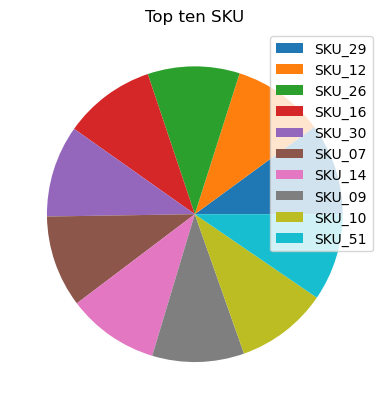

In [75]:
plt.pie(df['SKU'].value_counts().head(10))
plt.legend(df['SKU'].value_counts().index.tolist())
plt.title('Top ten SKU')
plt.show()

In [76]:
df['SKU'].isnull().sum()

0

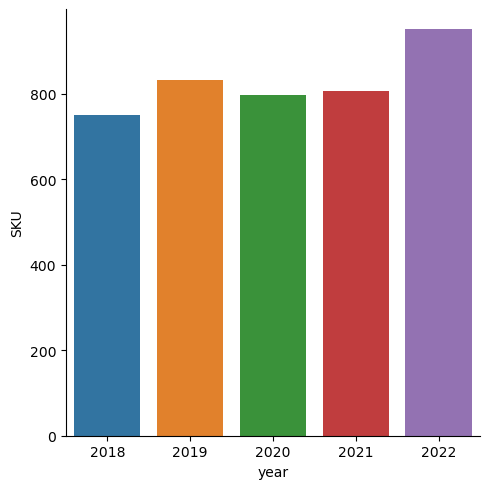

In [77]:
pd.set_option('display.max.rows',None)
temp_df=df.groupby('year')['SKU'].count().sort_values(ascending=False).reset_index(level=0)
temp_df
sns.catplot(kind='bar',data=temp_df,x='year',y='SKU')

<Figure size 1500x700 with 0 Axes>

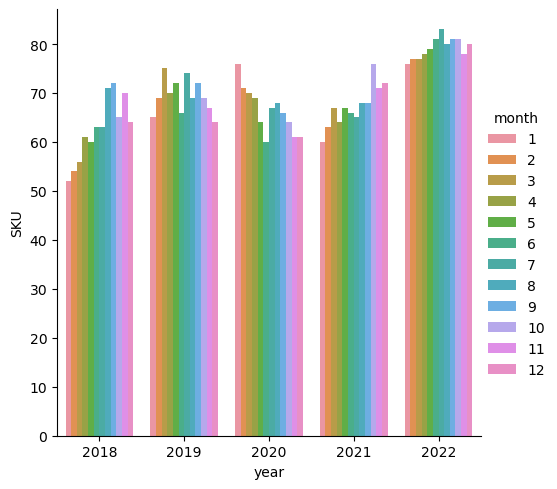

In [78]:
plt.figure(figsize=(15,7),edgecolor='black')
pd.set_option('display.max.rows',None)
temp_df=df.groupby(['month','year'])['SKU'].count().reset_index().sort_values(by='month',ascending=True)
temp_df
sns.catplot(kind='bar',data=temp_df,x='year',y='SKU',hue='month')

In [79]:
df['Group'].describe()

count     4138
unique      25
top          D
freq       592
Name: Group, dtype: object

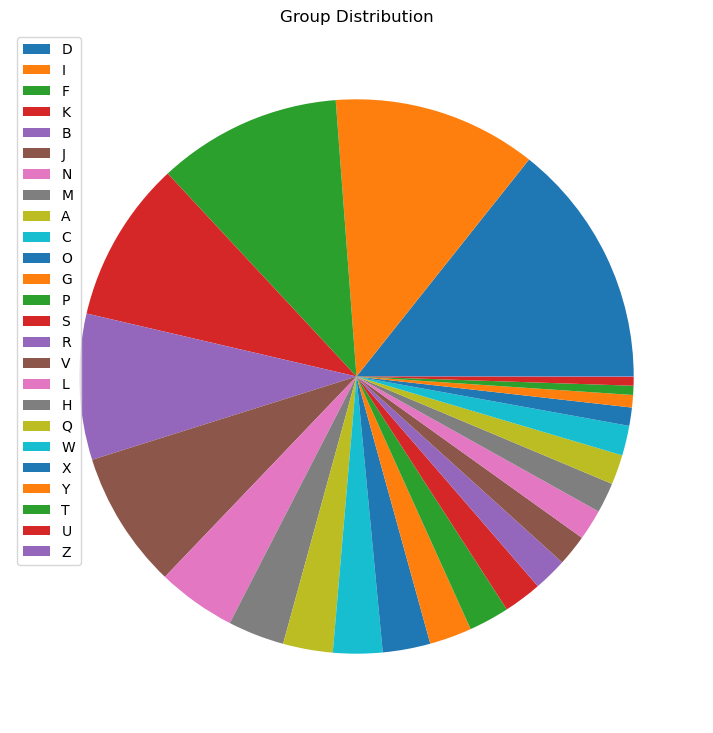

In [80]:
plt.figure(figsize=(10,9))
plt.pie(df['Group'].value_counts())
plt.legend(df['Group'].value_counts().index.tolist())
plt.title('Group Distribution')
plt.show()

Text(0.5, 1.0, 'Total Sales Pkg per group')

<Figure size 1000x1200 with 0 Axes>

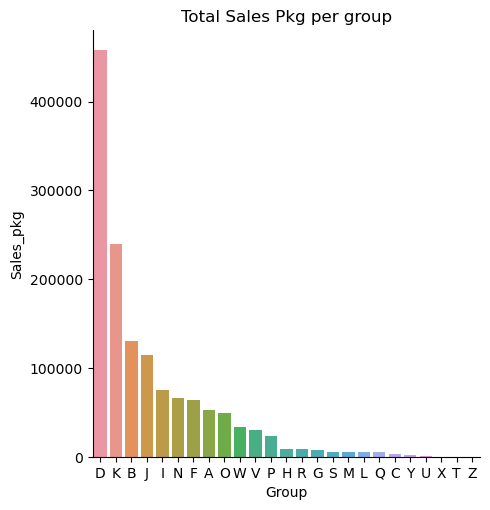

In [81]:
plt.figure(figsize=(10,12))
temp_df=df.groupby('Group')['Sales_pkg'].sum().sort_values(ascending=False).reset_index()
sns.catplot(kind='bar',data=temp_df,x='Group',y='Sales_pkg')
plt.title("Total Sales Pkg per group")

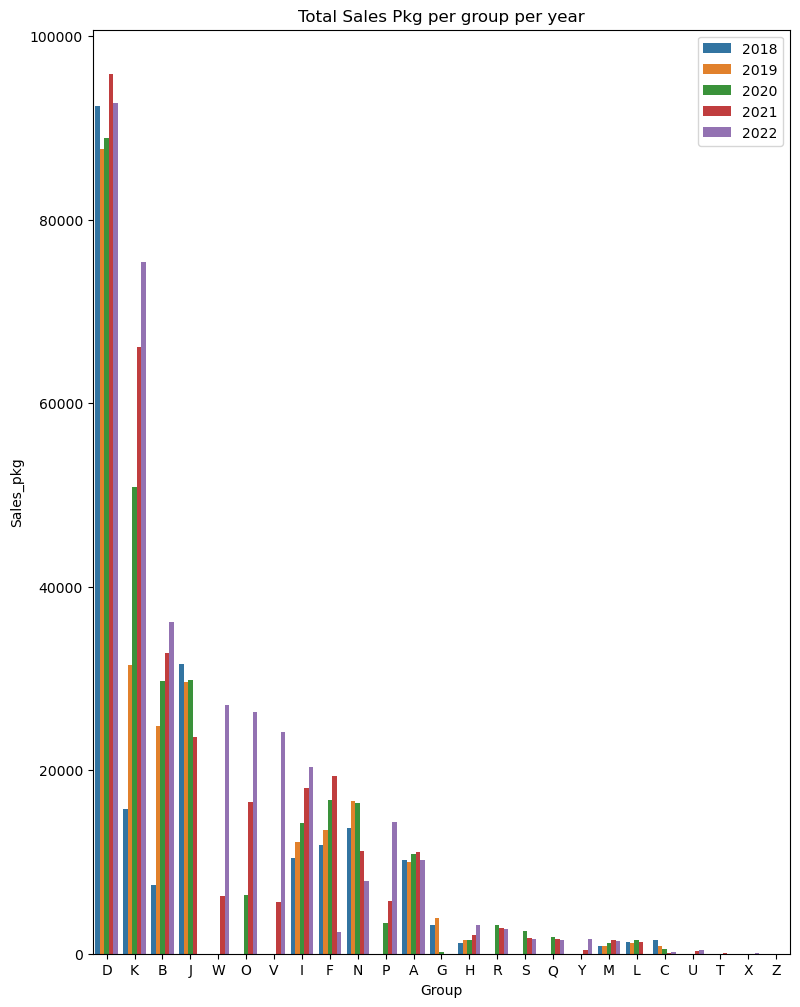

In [82]:
plt.figure(figsize=(9,12))
temp_df=df.groupby(['year','Group'])['Sales_pkg'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=temp_df,x='Group',y='Sales_pkg',hue='year',)
plt.title("Total Sales Pkg per group per year")
plt.legend(loc='upper right')

In [83]:
df['Group'].isnull().sum()

0

In [84]:
df['Units_pkg'].describe()

count    4138.000000
mean       12.881344
std        22.024843
min         0.000000
25%         5.000000
50%         5.000000
75%         7.000000
max       100.000000
Name: Units_pkg, dtype: float64

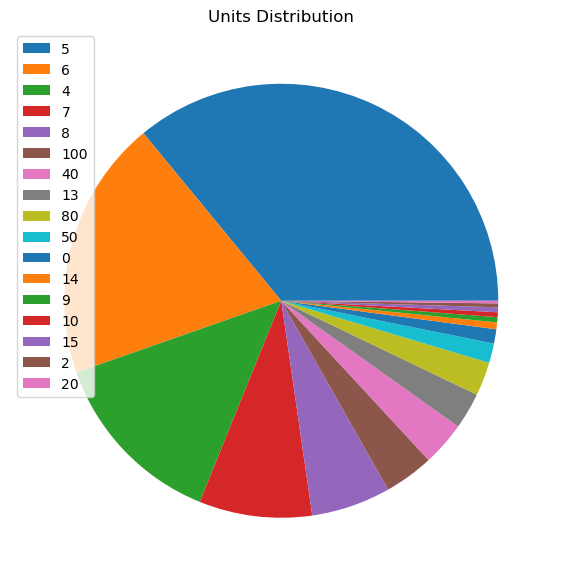

In [85]:
plt.figure(figsize=(7,12))
plt.pie(df['Units_pkg'].value_counts())
plt.legend(df['Units_pkg'].value_counts().index.tolist())
plt.title('Units Distribution')
plt.show()

In [86]:
df['Units_pkg'].isnull().sum()

0

In [87]:
df.isnull().sum()

Date             0
SKU              0
Group            0
Units_pkg        0
Avg_price_pkg    0
Sales_pkg        0
year             0
month            0
dtype: int64

In [88]:
df.corr()['Units_pkg']

/var/folders/h3/kfscfv014s7g3ky2rd6szqpm0000gn/T/ipykernel_14462/824980209.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Units_pkg']


Units_pkg        1.000000
Avg_price_pkg   -0.111470
Sales_pkg       -0.081881
year             0.007169
month            0.002900
Name: Units_pkg, dtype: float64

In [89]:
df.corr()

/var/folders/h3/kfscfv014s7g3ky2rd6szqpm0000gn/T/ipykernel_14462/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Units_pkg,Avg_price_pkg,Sales_pkg,year,month
Units_pkg,1.000000,-0.111470,-0.081881,0.007169,0.002900
Avg_price_pkg,-0.111470,1.000000,-0.063752,0.193212,0.040412
Sales_pkg,-0.081881,-0.063752,1.000000,0.105449,-0.022128
year,0.007169,0.193212,0.105449,1.000000,-0.008466
month,0.002900,0.040412,-0.022128,-0.008466,1.000000


/var/folders/h3/kfscfv014s7g3ky2rd6szqpm0000gn/T/ipykernel_14462/126480072.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_heatmap = sns.heatmap(df.corr())


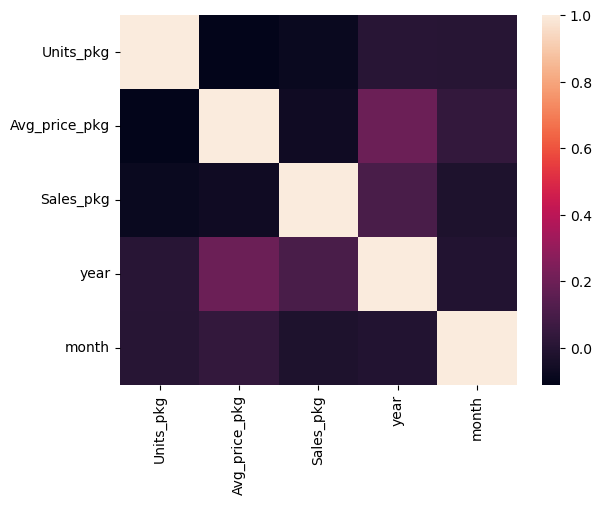

In [90]:
import seaborn as sns
corr_heatmap = sns.heatmap(df.corr())


/Users/kennetharaga/opt/anaconda3/envs/bootcamp/lib/python3.10/site-packages/seaborn/categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Units pkg per group per year')

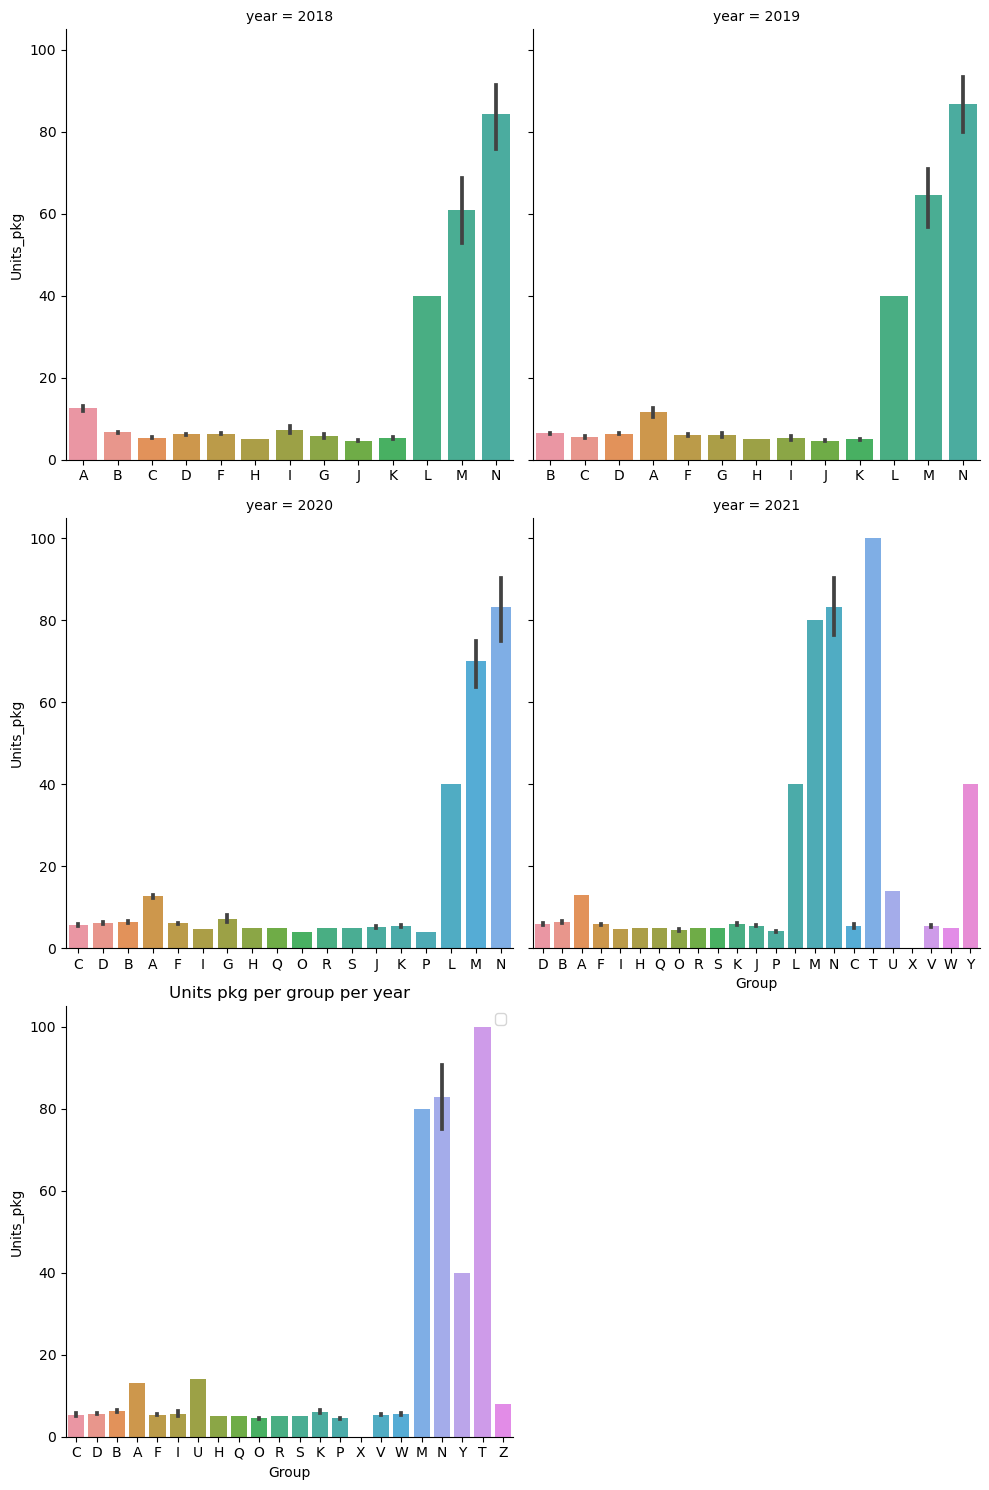

In [91]:
#Units pkg per group per year
sns.catplot(data=df,x='Group',y='Units_pkg',kind='bar',col='year',col_wrap=2,sharex=False)
plt.legend()
plt.title("Units pkg per group per year")
#M,N group has more unit pkg in 2018,2019,2020
# but from 2021,2022 T has more unit pkg than M,N

<AxesSubplot: xlabel='year', ylabel='Avg_price_pkg'>

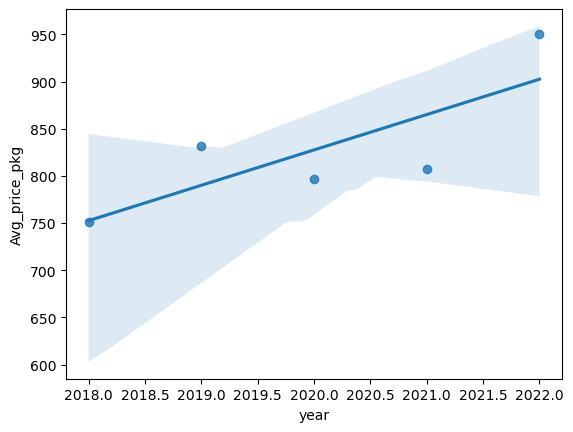

In [92]:
#total count of Avg price pkg per year
temp_df=df.groupby(['year'])['Avg_price_pkg'].count().reset_index().sort_values(by='year',ascending=False)
sns.regplot(data=temp_df,x='year',y='Avg_price_pkg')

/Users/kennetharaga/opt/anaconda3/envs/bootcamp/lib/python3.10/site-packages/seaborn/categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


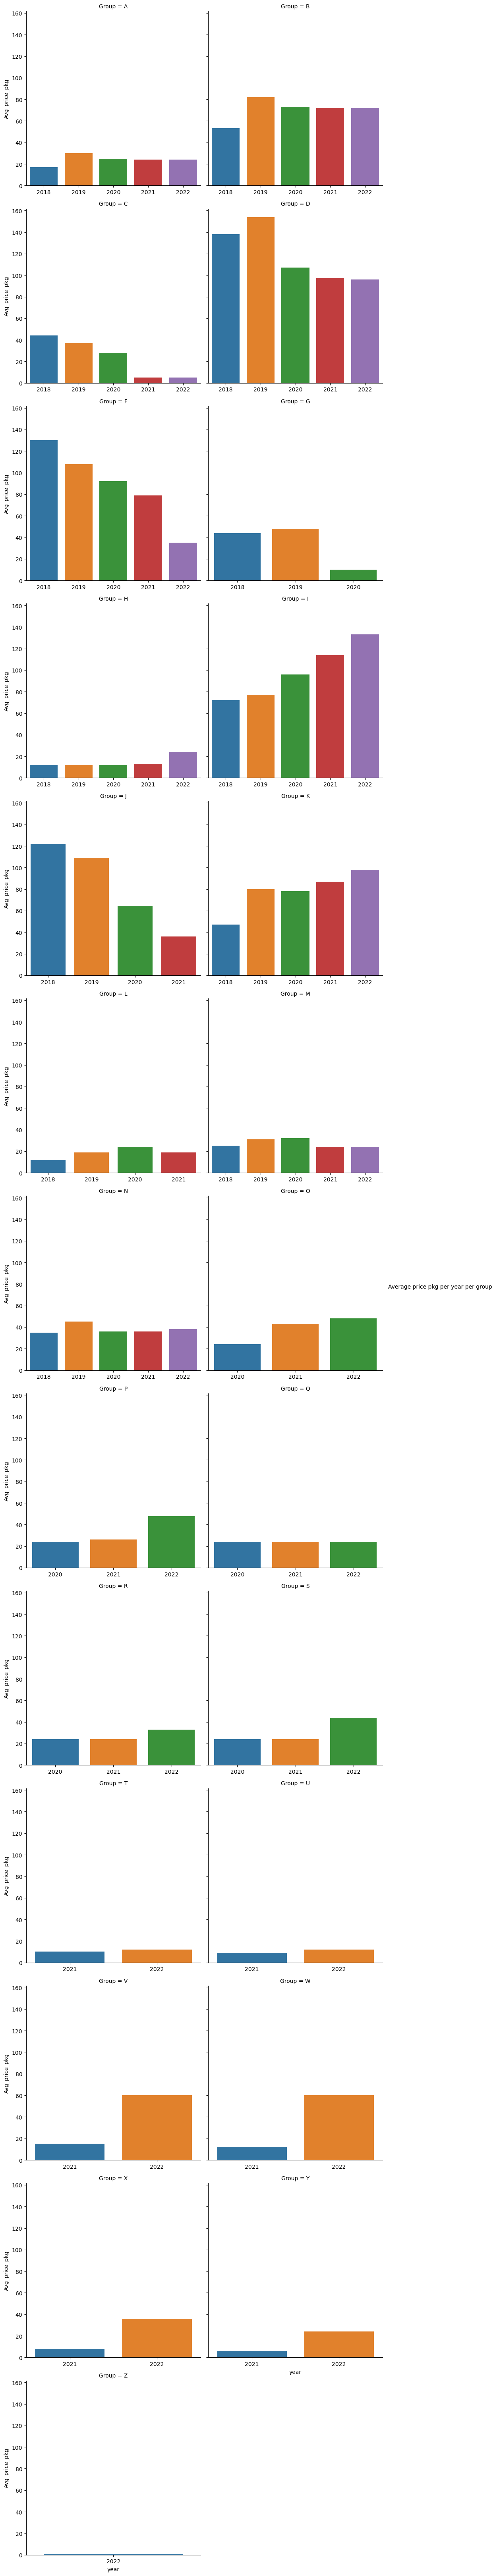

In [93]:
temp_df=df.groupby(['year','Group'])['Avg_price_pkg'].count().reset_index()
# Average price pkg per year per group
sns.catplot(kind='bar',data=temp_df,x='year',y='Avg_price_pkg',col='Group',col_wrap=2,sharex=False,legend=True).add_legend(title="Average price pkg per year per group")

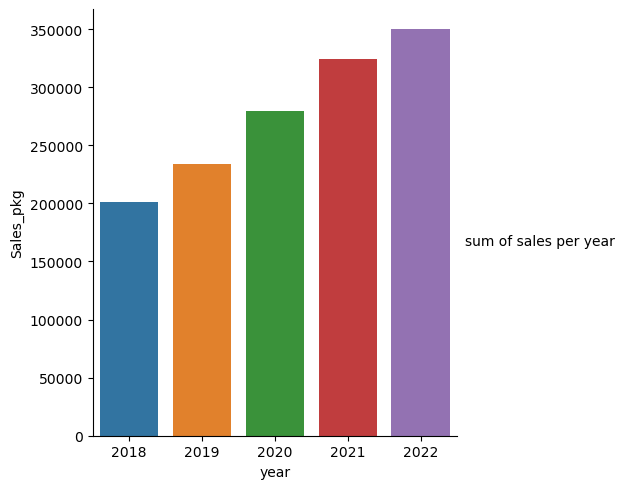

In [94]:
temp_df=df.groupby('year')['Sales_pkg'].sum().reset_index()
sns.catplot(kind='bar',x='year',y='Sales_pkg',data=temp_df).add_legend(title="sum of sales per year")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'sum of sales per year')

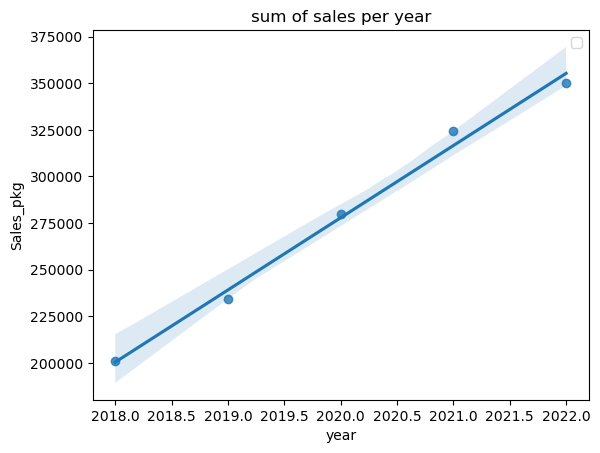

In [95]:
temp_df=df.groupby('year')['Sales_pkg'].sum().reset_index()
sns.regplot(x='year',y='Sales_pkg',data=temp_df)
plt.legend()
plt.title("sum of sales per year")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'sum of sales per year per group')

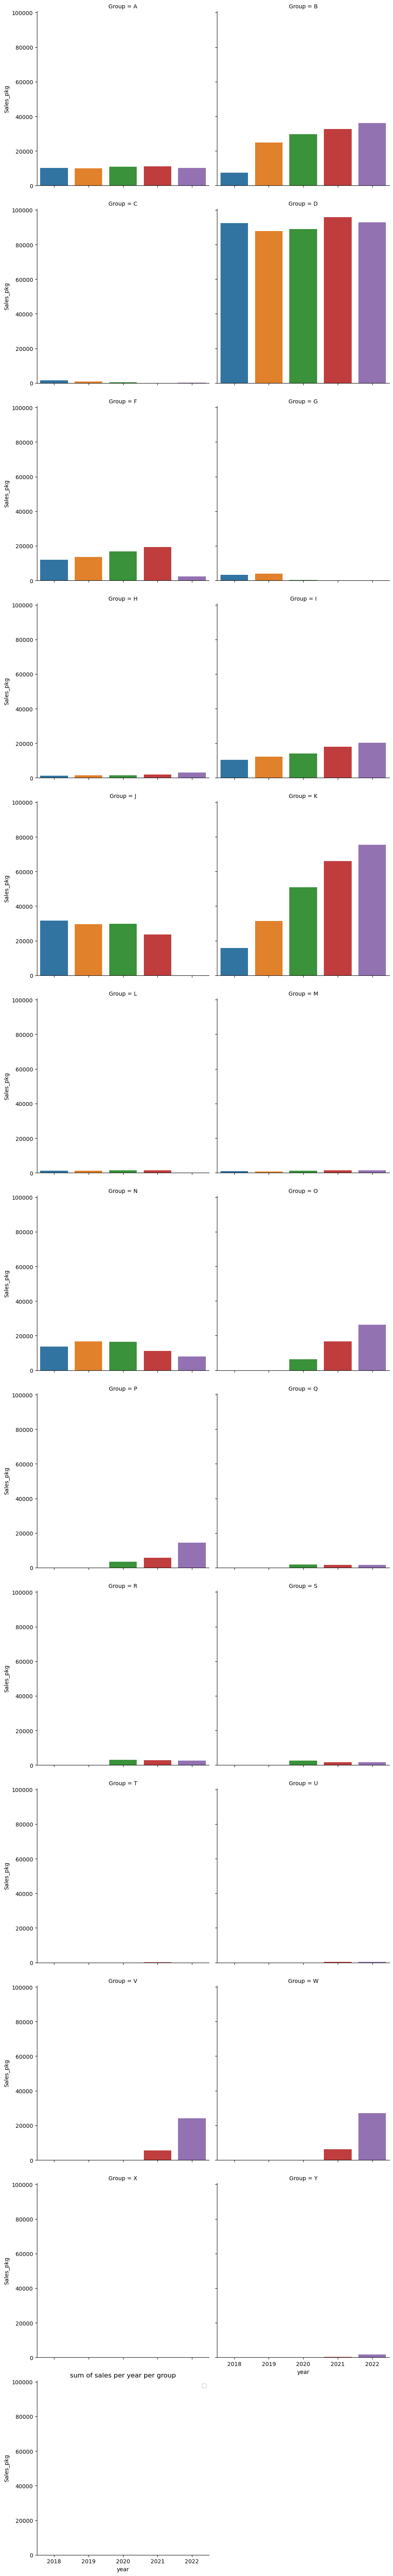

In [96]:
temp_df=df.groupby(['Group','year'])['Sales_pkg'].sum().reset_index()
sns.catplot(x='year',y='Sales_pkg',data=temp_df,col='Group',kind='bar',col_wrap=2)
plt.legend()
plt.title("sum of sales per year per group")